# Augmentação de dados

Serão aplicada as funções:
* Logaritmo da imagem
* Exponencial da imagem
* Filtro da média usando convolução

In [56]:
! rm -rf tools_classifier
! git clone https://github.com/zRafaF/tools_classifier

Cloning into 'tools_classifier'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 197 (delta 3), reused 7 (delta 3), pack-reused 188 (from 1)
Receiving objects: 100% (197/197), 106.14 MiB | 33.43 MiB/s, done.
Resolving deltas: 100% (5/5), done.


Importando bibliotecas e definindo constantes

In [ ]:
import numpy as np
from scipy.ndimage import convolve
import cv2

IMAGES_PATH = "tools_classifier/data_set/cropped_resized_png"

## Funções


In [73]:
def log_transform(image_np):
    gamma = 0.5 # Parâmetro de ajuste

    image_normalized = 255 / np.log(1 + np.max(image_np))
    log_image = image_normalized * (np.log(image_np + gamma))

    log_image = np.array(log_image, dtype = np.uint8)
    return log_image

def exp_transform(image_np):
    gamma = 3.0  # Parâmetro de ajuste

    image_normalized = image_np / 255.0
    exp_image = np.exp(image_normalized * gamma) - 1
    exp_image = np.uint8(exp_image / np.max(exp_image) * 255)

    return exp_image

def mean_filter(image_np):
    kernel_size = 11 # Parâmetro de ajuste

    return cv2.medianBlur(image_np, kernel_size)

## Aplicando operações a uma imagem

In [72]:
from skimage import io

image = io.imread(IMAGES_PATH + "/2-01-V1-B.png")
image_numpy = np.array(image)

log_image = log_transform(image_numpy)
exp_image = exp_transform(image_numpy)
blurred_image = mean_filter(image_numpy)

## Plotando

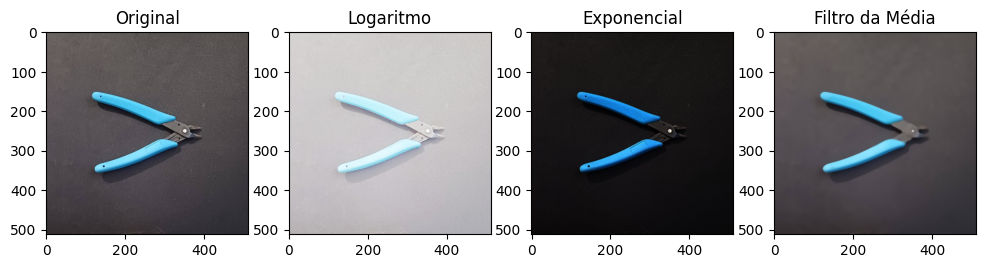

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(image_np)
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(log_image)
plt.title('Logaritmo')

plt.subplot(1, 4, 3)
plt.imshow(exp_image)
plt.title('Exponencial')

plt.subplot(1, 4, 4)
plt.imshow(blurred_image)
plt.title('Filtro da Média')

plt.show()

## Aplicando ao data_set

Primeiro vamos extrair os dados da imagem a partir de seu nome

In [60]:
from skimage import io
import os

images_dict = []

for filename in os.listdir(IMAGES_PATH):
    if filename.endswith('.png'):
        img_path = os.path.join(IMAGES_PATH, filename)

        image = io.imread(img_path)

        # Divide o nome do arquivo para extrair informações
        splitted = filename.split(".")[0].split("-")

        current_dict = {
            "classid": splitted[0],
            "img_sequence": splitted[1],
            "V1|V2": splitted[2],
            "B|W": splitted[3],
            "filename": filename,
            "image": image
        }

        images_dict.append(current_dict)
print(images_dict[0])

{'classid': '2', 'img_sequence': '01', 'V1|V2': 'V2', 'B|W': 'W', 'filename': '2-01-V2-W.png', 'image': array([[[161, 165, 168],
        [160, 164, 167],
        [159, 163, 166],
        ...,
        [154, 155, 150],
        [154, 155, 150],
        [155, 156, 151]],

       [[162, 166, 169],
        [161, 165, 168],
        [161, 165, 168],
        ...,
        [154, 155, 150],
        [153, 154, 149],
        [154, 155, 150]],

       [[161, 165, 166],
        [160, 164, 165],
        [160, 164, 165],
        ...,
        [154, 155, 150],
        [153, 154, 149],
        [154, 155, 150]],

       ...,

       [[178, 174, 171],
        [177, 173, 170],
        [177, 173, 170],
        ...,
        [163, 162, 158],
        [162, 161, 157],
        [162, 161, 157]],

       [[176, 175, 171],
        [176, 175, 171],
        [175, 174, 170],
        ...,
        [163, 162, 158],
        [163, 162, 158],
        [163, 162, 158]],

       [[175, 174, 170],
        [174, 173, 169],
        

Agora vamos realiza a augumentação.

Primeiro vamos criar o diretório

In [62]:
new_path = './augmented_data_set'
if not os.path.exists(new_path):
    os.makedirs(new_path)


Agora realizar as operações sobre a lista de imagens

In [65]:
for img in images_dict:
    log_image = log_transform(img["image"])
    exp_image = exp_transform(img["image"])
    blurred_image = mean_filter(img["image"])

    name_normal = img["classid"] + '-01-' + img["V1|V2"] + "-" + img["B|W"] + ".png"
    name_log = img["classid"] + '-02-' + img["V1|V2"] + "-" + img["B|W"] + ".png"
    name_exp = img["classid"] + '-03-' + img["V1|V2"] + "-" + img["B|W"] + ".png"
    name_blurred = img["classid"] + '-04-' + img["V1|V2"] + "-" + img["B|W"] + ".png"

    print([name_normal, name_log, name_exp, name_blurred])

    io.imsave(new_path + "/" + name_normal, img["image"])
    io.imsave(new_path + "/" + name_log, log_image)
    io.imsave(new_path + "/" + name_exp, exp_image)
    io.imsave(new_path + "/" + name_blurred, blurred_image)


['2-01-V2-W.png', '2-02-V2-W.png', '2-03-V2-W.png', '2-04-V2-W.png']
['9-01-V2-W.png', '9-02-V2-W.png', '9-03-V2-W.png', '9-04-V2-W.png']


<ipython-input-65-1b1dcb863e80>:14: UserWarning: ./augmented_data_set/9-02-V2-W.png is a low contrast image
  io.imsave(new_path + "/" + name_log, log_image)


['2-01-V1-W.png', '2-02-V1-W.png', '2-03-V1-W.png', '2-04-V1-W.png']
['9-01-V2-B.png', '9-02-V2-B.png', '9-03-V2-B.png', '9-04-V2-B.png']
['5-01-V1-B.png', '5-02-V1-B.png', '5-03-V1-B.png', '5-04-V1-B.png']
['8-01-V2-B.png', '8-02-V2-B.png', '8-03-V2-B.png', '8-04-V2-B.png']
['5-01-V2-W.png', '5-02-V2-W.png', '5-03-V2-W.png', '5-04-V2-W.png']
['7-01-V1-W.png', '7-02-V1-W.png', '7-03-V1-W.png', '7-04-V1-W.png']
['6-01-V1-W.png', '6-02-V1-W.png', '6-03-V1-W.png', '6-04-V1-W.png']
['1-01-V1-B.png', '1-02-V1-B.png', '1-03-V1-B.png', '1-04-V1-B.png']
['7-01-V1-B.png', '7-02-V1-B.png', '7-03-V1-B.png', '7-04-V1-B.png']
['9-01-V1-B.png', '9-02-V1-B.png', '9-03-V1-B.png', '9-04-V1-B.png']
['2-01-V2-B.png', '2-02-V2-B.png', '2-03-V2-B.png', '2-04-V2-B.png']
['1-01-V1-W.png', '1-02-V1-W.png', '1-03-V1-W.png', '1-04-V1-W.png']
['8-01-V1-W.png', '8-02-V1-W.png', '8-03-V1-W.png', '8-04-V1-W.png']
['8-01-V2-W.png', '8-02-V2-W.png', '8-03-V2-W.png', '8-04-V2-W.png']
['6-01-V2-B.png', '6-02-V2-B.png',

<ipython-input-65-1b1dcb863e80>:14: UserWarning: ./augmented_data_set/9-02-V1-W.png is a low contrast image
  io.imsave(new_path + "/" + name_log, log_image)


['6-01-V2-W.png', '6-02-V2-W.png', '6-03-V2-W.png', '6-04-V2-W.png']
['8-01-V1-B.png', '8-02-V1-B.png', '8-03-V1-B.png', '8-04-V1-B.png']
['2-01-V1-B.png', '2-02-V1-B.png', '2-03-V1-B.png', '2-04-V1-B.png']
['1-01-V2-W.png', '1-02-V2-W.png', '1-03-V2-W.png', '1-04-V2-W.png']
['7-01-V2-W.png', '7-02-V2-W.png', '7-03-V2-W.png', '7-04-V2-W.png']
['6-01-V1-B.png', '6-02-V1-B.png', '6-03-V1-B.png', '6-04-V1-B.png']
['5-01-V1-W.png', '5-02-V1-W.png', '5-03-V1-W.png', '5-04-V1-W.png']


In [68]:
!zip -r augmented_data_set.zip augmented_data_set/

  adding: augmented_data_set/ (stored 0%)
  adding: augmented_data_set/1-04-V1-B.png (deflated 0%)
  adding: augmented_data_set/9-03-V1-W.png (deflated 0%)
  adding: augmented_data_set/2-01-V2-W.png (deflated 0%)
  adding: augmented_data_set/8-04-V1-W.png (deflated 0%)
  adding: augmented_data_set/8-02-V2-B.png (deflated 0%)
  adding: augmented_data_set/8-03-V2-W.png (deflated 0%)
  adding: augmented_data_set/6-03-V2-B.png (deflated 0%)
  adding: augmented_data_set/9-01-V2-W.png (deflated 0%)
  adding: augmented_data_set/8-04-V1-B.png (deflated 0%)
  adding: augmented_data_set/2-01-V1-W.png (deflated 0%)
  adding: augmented_data_set/5-04-V2-W.png (deflated 0%)
  adding: augmented_data_set/6-02-V1-B.png (deflated 0%)
  adding: augmented_data_set/1-02-V1-B.png (deflated 0%)
  adding: augmented_data_set/2-03-V1-W.png (deflated 0%)
  adding: augmented_data_set/9-01-V2-B.png (deflated 0%)
  adding: augmented_data_set/2-03-V2-B.png (deflated 0%)
  adding: augmented_data_set/6-02-V1-W.png (de